# Importing Libraries

- In order to improve code readability, import all need library that was used and to prevent error from missing imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Overview of Dataset

- **Import the Spotify Data Sheet**
  - Use **<span style="background-color: #FFDFD3; color: black">pd.read_csv</span>** in order to import the **<span style="background-color: #FFDFD3; color: black">CSV</span>** file named **<span style="background-color: #FFDFD3; color: black">SpotifyData2023.csv</span>** to variable which in this case called dataset


In [6]:
#Load CSV file and assign to a variable
dataset = pd.read_csv('SpotifyData2023.csv')
dataset

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


### Number of Rows and Columns

  - In order to determine the number of rows and columns, the **<span style="background-color: #FFDFD3; color: black">'.shape'</span>** command can be used
  - **Syntax** - **<span style="background-color: #FFDFD3; color: black">variable1, variable2 = dataframe_name.shape</span>**
    - **dataframe_name** - dataframe created or extracted from a csv/xlsx file
    - **'.shape'** - returns the dimensions of the dataframe as a tuple
  - **Expected Outcome** - Printed output of number of rows and columns

In [9]:
#Obtain the number of rows and columns from the dataset and assign it to a variable
rows, columns = dataset.shape
#Print the number of Rows
print('Number of Rows:',rows)
#Print the number of Columns
print('Number of Columns:',columns)

Number of Rows: 953
Number of Columns: 24


### Number of Missing Values

- **Missing Values**
  - In order to calculate the count of missing values for each column in the dataset, we need to determine the **total number of NaN** (Not a Number) elements in the dataset
  - The command **<span style="background-color: #FFDFD3; color: black">'.isnull'</span>** can be used to determine if an elemenet in a dataframe is NaN
- **Data Type Issue**
  - By observing the given spotify csv file, it can be seen that at the column 'streams' there is one data which is a string
  - To properly count number of Missing Values, change the string into a NaN value

In [12]:
# Convert non-numeric values to NaN
dataset['streams'] = pd.to_numeric(dataset['streams'], errors='coerce')
# Calculate the count of missing values for each column in the dataset
missingval_count = dataset.isnull().sum().reset_index()
#Change column names for better presentation of table
missingval_count.columns=['Columns', 'Missing_Value']
# Display the missing values count and limit the number of printed results to not clutter up the terminal
print('Missing values per column:')
print('\n',missingval_count.head(10))

Missing values per column:

                 Columns  Missing_Value
0            track_name              0
1        artist(s)_name              0
2          artist_count              0
3         released_year              0
4        released_month              0
5          released_day              0
6  in_spotify_playlists              0
7     in_spotify_charts              0
8               streams              1
9    in_apple_playlists              0


- **Missing Values Plot**
  - To properly visualize the data, a bar plot can be used
  - To make syntax simpler and easier to understand, seaborn will be used to create the plot and matplotlib will only be used to adjust parameters of the plot
  - **Commands Used**
    - **sns.barplot()** - Creates a barplot of the given data
      - **Syntax** - sns.barplot(x=data1, y=data2, palette="pallete_colors", hue=data1)
    - **plt.title()** - Creates the title of the plot
    - **plt.figure(figsize=(x,y))** - Determines the canvas size of the plot
    - **plt.xticks()** - Rotates the text of the x and y data
    - **plt.xlabel** - Creates Label for X Axis
    - **plt.ylabel** - Creates Label for Y Axis
    - **plt.legend()** - Creates Legend
    - **plt.show()** - Prints the plot

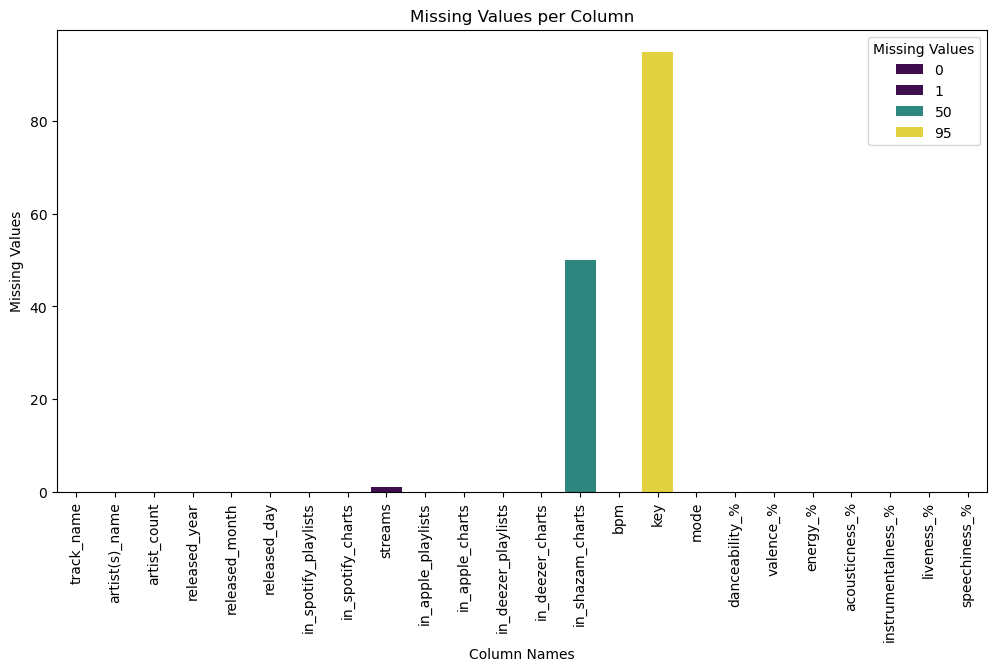

In [14]:
# Calculate the sum of missing values (NaN) for each column in the dataset
missingval_count = dataset.isnull().sum()

# Create a new figure with specified size 
plt.figure(figsize=(12, 6))

# Create a bar plot using seaborn
# x-axis: column names from the dataset
# y-axis: count of missing values
# palette: "viridis" color scheme
# hue: color intensity based on missing value count
sns.barplot(x=missingval_count.index, y=missingval_count.values, palette="viridis",hue=missingval_count)

# Customize the format of the plot and add titles
plt.title('Missing Values per Column')
plt.xticks(rotation=90)
plt.xlabel('Column Names')
plt.ylabel('Missing Values')
plt.legend(title='Missing Values')
plt.show()

## Determining Data Types

- To determine data types, the command **<span style="background-color: #FFDFD3; color: black">'.dtypes'</span>** can be used.
- To calculate the number of columns with each data type, the command **<span style="background-color: #FFDFD3; color: black">'.value_counts'</span>** can be used
  - **Syntax** - varname = dataFrame.dtypes.valuecounts()

In [17]:
# determine number of columns per data type in the dataset
data_types = dataset.dtypes.value_counts()
#to properly change the column name without affect the data, assign data_types to another variable
data_types_table = data_types.reset_index()
#Rename columns
data_types_table.columns = ['Data Type', 'No. Col']
#print the table
print('Number of Columns per data type:')
data_types_table


Number of Columns per data type:


,Data Type,No. Col
0,int64,17
1,object,6
2,float64,1


- **Data Type Plot**
  - To properly visualize data, a barplot can be used.
  - **Commands Used**
    - **sns.barplot()** - Creates a barplot of the given data
   - **Syntax** - sns.barplot(x=data1, y=data2, palette="pallete_colors", hue=data1)
    - **plt.title()** - Creates the title of the plot
    - **plt.figure(figsize=(x,y))** - Determines the canvas size of the plot
    - **plt.xticks()** - Rotates the text of the x and y data
    - **plt.xlabel** - Creates Label for X Axis
    - **plt.ylabel** - Creates Label for Y Axis
    - **plt.show()** - Prints the plot

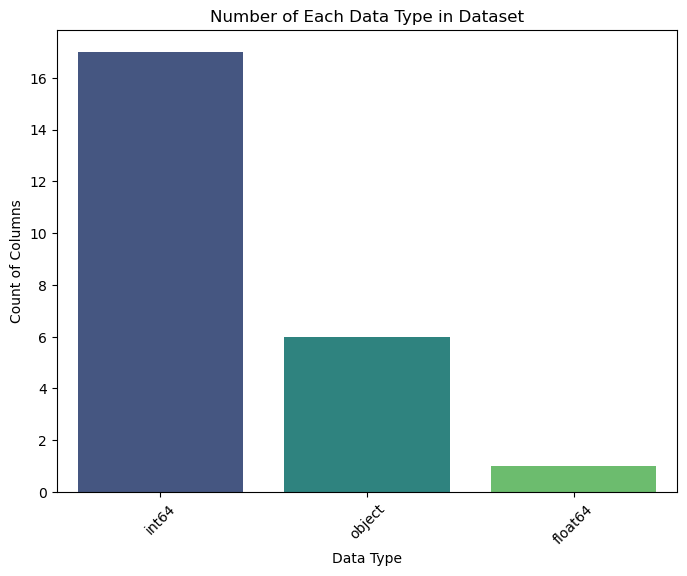

In [19]:
# Set figure with specified size 
plt.figure(figsize=(8, 6))

# Create barplot using seaborn
sns.barplot(x=data_types.index.astype(str), y=data_types.values, palette="viridis",hue=data_types.index.astype(str))

# Customize the format of the plot and add titles
plt.title("Number of Each Data Type in Dataset")
plt.xlabel("Data Type")
plt.ylabel("Count of Columns")
plt.xticks(rotation=45)
plt.show()

### Data Types for Each Column

- **Commands Used**
  - **'.dtypes()'** - returns data type of each column
  - **.reset_index()** - used to properly format the table

In [22]:
#Determine the the data type for each column and assign to a variable
column_data_types = dataset.dtypes.reset_index()
#Renames the columns of column_data_types
column_data_types.columns = ['Column', '   Data Type']
# Display the DataFrame with column names and their data types
print("\nData types of each column:") 
column_data_types


Data types of each column:


,Column,Data Type
0,track_name,object
1,artist(s)_name,object
2,artist_count,int64
3,released_year,int64
4,released_month,int64
5,released_day,int64
6,in_spotify_playlists,int64
7,in_spotify_charts,int64
8,streams,float64
9,in_apple_playlists,int64


## Data Wrangling

- To properly utilize the data from the spotify dataset, the data set must be manipulated in order to interpret and extract useful data
- **Problems with the Dataset**
  - **Missing Value Columns** - replace NaN values with 0 using command '.fillna()
  - **Columns with numbers** - replace values containing strings and change datatype into integers

In [25]:
# Replace missing values with 0
dataset.fillna(0, inplace=True)  # The inplace=True modifies the DataFrame in place

#Replace values with commas and change data type into integer
dataset['in_deezer_playlists'] = dataset['in_deezer_playlists'].astype(str).str.replace(',', '').fillna(0).astype(float).astype(int)
dataset['in_shazam_charts'] = dataset['in_shazam_charts'].astype(str).str.replace(',', '').fillna(0).astype(float).astype(int)


## Basic Descriptive Statistics

- **Commands Used**
  - **'.mean()'** - finds the average of the column
  - **'median()'** - finds the median of the column
  - **'.std()'** - finds the standard deviation of the column
- **Syntax**
  - varname = dataFrame.iloc[col].stat_command()
    - **'.iloc'** - slicing index of 'streams' column
    - **'.stat_command()'** - use the appropriate statistical command (mean, median, std_dev)

In [28]:
#Calculate the mean of the 'streams' column
mean = dataset.iloc[:, 8].mean()
print('The Average Number of Streams is:',mean)

#Calculate the median of the 'streams' column
median = dataset.iloc[:, 8].median()
print('The Median of Number of Streams is:',median)

#Calculate the standard deviation of the 'streams' column
stddev = dataset.iloc[:, 8].std()
print('The Standard Deviation of Streams is:', stddev)

The Average Number of Streams is: 513597931.3137461
The Median of Number of Streams is: 290228626.0
The Standard Deviation of Streams is: 566803887.0588316


- **Number of Songs per Year**
  - **Syntax**
    - varname = dataframe['released_year'].value_counts().sort_index().reset_index()
    - **.value_counts()** - counts the occurrences of each unique value in the released_year column of dataset.
    - **.sort_index()** - sorts the results by the index

In [30]:
#Calculate the number of songs released per year
tracks_per_year = dataset['released_year'].value_counts().sort_index().reset_index()

#change column names
tracks_per_year.columns=['Released_Year', 'Number of tracks']

# Display the result first 5 and last 5 to keep the terminal tidy
print("Number of Songs per Year:")
print(tracks_per_year.head())
print(tracks_per_year.tail())


Number of Songs per Year:
   Released_Year  Number of tracks
0           1930                 1
1           1942                 1
2           1946                 1
3           1950                 1
4           1952                 1
    Released_Year  Number of tracks
45           2019                36
46           2020                37
47           2021               119
48           2022               402
49           2023               175


### Plot for number of tracks released each year

- To properly visualize the data, a line plot can be used
  - **Commands Used**
    - **sns.lineplot()** - Creates a barplot of the given data
      - **Syntax** - sns.lineplot(x=data1, y=data2,marker="o", color='b')
    - **plt.title()** - Creates the title of the plot
    - **plt.figure(figsize=(x,y))** - Determines the canvas size of the plot
    - **plt.xticks()** - Rotates the text of the x and y data
    - **plt.xlabel** - Creates Label for X Axis
    - **plt.ylabel** - Creates Label for Y Axis
    - **plt.legend()** - Creates Legend
    - **plt.grid()** - Creates grid in the polt
    - **plt.show()** - Prints the plot
 the plot

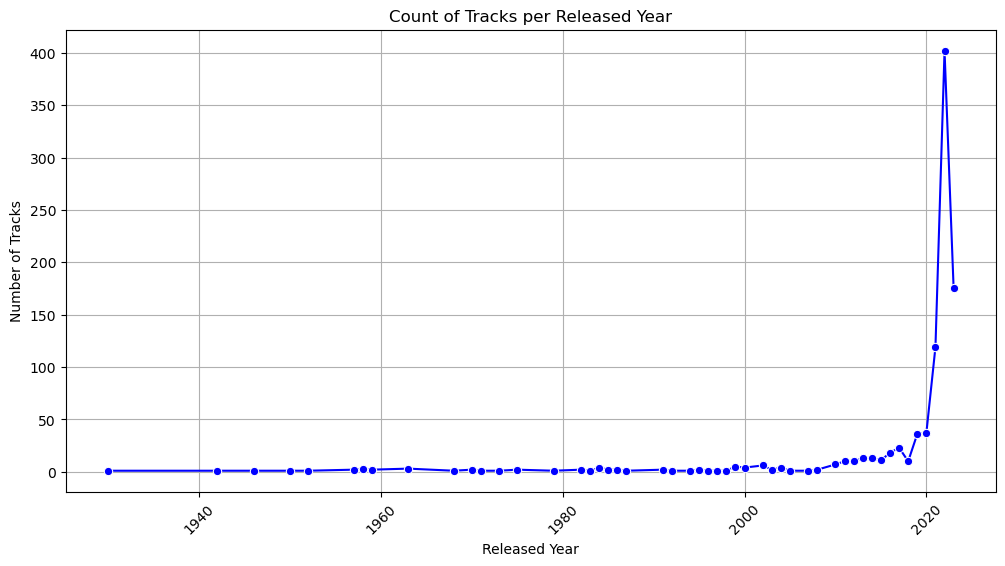

In [33]:
# Count the number of tracks released each year
tracks_per_year = dataset['released_year'].value_counts().sort_index()

# Plotting the line plot for the count of songs per released year
plt.figure(figsize=(12, 6))
sns.lineplot(x=tracks_per_year.index, y=tracks_per_year.values, marker="o", color='b')

# Customize the format of the plot and add titles
plt.title("Count of Tracks per Released Year")
plt.xlabel("Released Year")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

### Number of Tracks per Artist Count

- To calculate the number of tacks per artist count, the command **<span style="background-color: #FFDFD3; color: black">'.value_counts'</span>** can be used
  - **Syntax** - varname = dataFrame[artist_count].valuecounts().sort_index().reset_index()
  - **.value_counts()** - counts the occurrences of each unique value in the released_year column of dataset.
  - **.reset_index()** - used to properly format the table

In [36]:
#Calculate number of tracks per number of artists
artist_count_values = dataset['artist_count'].value_counts().sort_index().reset_index()
#Rename columns to the proper format
artist_count_values.columns = ['Artist Count', 'Number of Tracks']
#Print Value
artist_count_values

,Artist Count,Number of Tracks
0,1,587
1,2,254
2,3,85
3,4,15
4,5,5
5,6,3
6,7,2
7,8,2


- To properly visualize the data, a bar plot can be used
  - **Commands Used**
    - **sns.barplot()** - Creates a barplot of the given data
      - **Syntax** - sns.barplot(x=data1, y=data2, palette="pallete_colors", hue=data1)
    - **plt.title()** - Creates the title of the plot
    - **plt.figure(figsize=(x,y))** - Determines the canvas size of the plot
    - **plt.xticks()** - Rotates the text of the x and y data
    - **plt.xlabel** - Creates Label for X Axis
    - **plt.ylabel** - Creates Label for Y Axis
    - **plt.legend()** - Creates Legend
    - **plt.show()** - Prints the plot


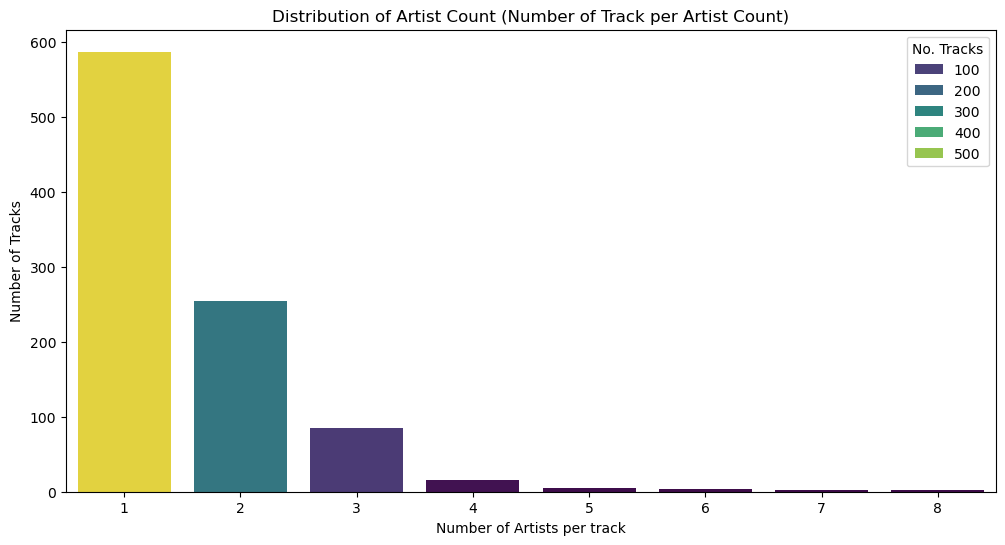

In [38]:
# Count the occurrences of each artist count (number of songs with a particular artist count)
artist_count_values = dataset['artist_count'].value_counts().sort_index()

# Configure figure size
plt.figure(figsize=(12, 6))

# Create barplot
sns.barplot(x=artist_count_values.index, y=artist_count_values.values, palette="viridis",hue=artist_count_values)

# Customize the format of the plot and add titles
plt.title("Distribution of Artist Count (Number of Track per Artist Count)")
plt.xlabel("Number of Artists per track")
plt.ylabel("Number of Tracks")
plt.legend(title='No. Tracks')
plt.show()


## Top Performers

- To determine the track that has the highest number of streams, we can use **<span style="background-color: #FFDFD3; color: black">'.sort_values'</span>** command

In [41]:
# Sort the dataset values by streams in descending order 
ascdataset = dataset.sort_values(by='streams',ascending=False)
# Display the top 5 most streamed tracks
ascdataset = ascdataset.head(5)
# Slice only 'track_name', 'artist(s)_name', 'streams'
ascdataset[['track_name', 'artist(s)_name', 'streams']]

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3.703895e+09
179,Shape of You,Ed Sheeran,3.562544e+09
86,Someone You Loved,Lewis Capaldi,2.887242e+09
620,Dance Monkey,Tones and I,2.864792e+09
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09


- To properly visualize the data, a bar plot can be used
  - **Commands Used**
    - **sns.barplot()** - Creates a barplot of the given data
      - **Syntax** - sns.barplot(x=data1, y=data2, palette="pallete_colors", hue=data1)
    - **plt.title()** - Creates the title of the plot
    - **plt.figure(figsize=(x,y))** - Determines the canvas size of the plot
    - **plt.xticks()** - Rotates the text of the x and y data
    - **plt.xlabel** - Creates Label for X Axis
    - **plt.ylabel** - Creates Label for Y Axis
    - **plt.show()** - Prints the plot

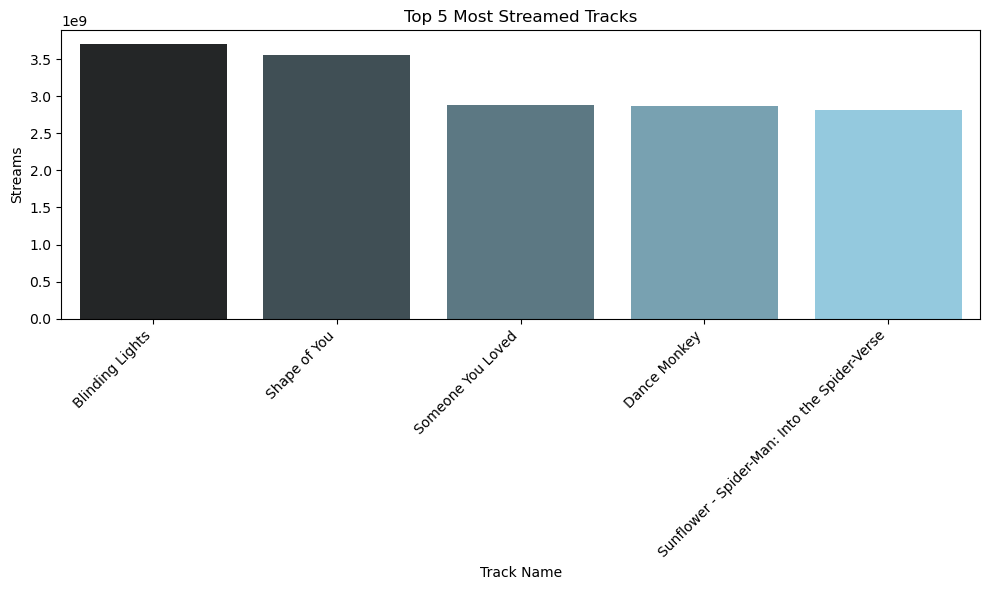

In [43]:
# Plotting the barplot for the top 5 most streamed tracks using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=ascdataset, x='track_name', y='streams', palette='dark:skyblue',hue='track_name')
plt.xlabel('Track Name')
plt.ylabel('Streams')
plt.title('Top 5 Most Streamed Tracks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Top 5 most frequent artists based on the number of tracks

- To calculate the number of tacks per artist, the command **<span style="background-color: #FFDFD3; color: black">'.value_counts'</span>** can be used
  - **Syntax** - varname = dataFrame[artist_count].valuecounts().sort_index().reset_index()
  - **.value_counts()** - counts the occurrences of each unique value in the released_year column of dataset.
  - **.reset_index()** - used to properly format the table
  - **.sort_index()** - sorts the index of the table

In [46]:
# Count the occurrences of each artists' appearance
topartist = dataset['artist(s)_name'].value_counts().reset_index()
topartist = topartist.head(5)
#rename the columns
topartist.columns = ['Artist Name', 'Tracks']
#print values
topartist

,Artist Name,Tracks
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


###  Plot for Top 5 Most Frequent Artists Based on the Number of tracks

- To properly visualize the data, a bar plot can be used
  - **Commands Used**
    - **sns.barplot()** - Creates a barplot of the given data
      - **Syntax** - sns.barplot(x=data1, y=data2, palette="pallete_colors", hue=data1)
    - **plt.title()** - Creates the title of the plot
    - **plt.figure(figsize=(x,y))** - Determines the canvas size of the plot
    - **plt.xticks()** - Rotates the text of the x and y data
    - **plt.xlabel** - Creates Label for X Axis
    - **plt.ylabel** - Creates Label for Y Axis
    - **plt.show()** - Prints the plot

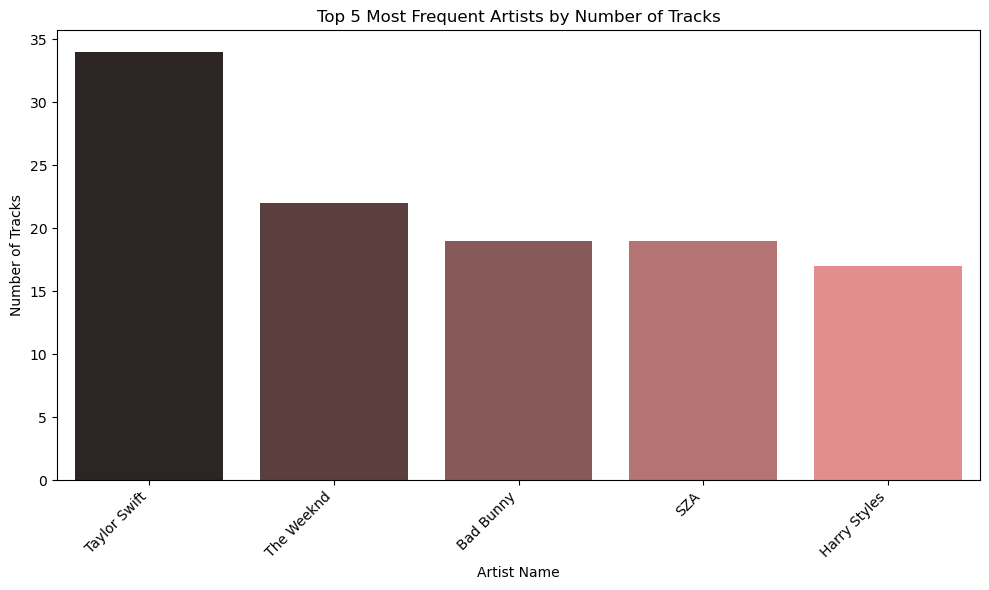

In [49]:
# Plotting the barplot for the top 5 most frequent artists by number of tracks using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=topartist, x='Artist Name', y='Tracks', palette='dark:lightcoral',hue='Artist Name')
plt.xlabel('Artist Name')
plt.ylabel('Number of Tracks')
plt.title('Top 5 Most Frequent Artists by Number of Tracks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Temporal Trends

- To calculate the number of tracks per year, the command **<span style="background-color: #FFDFD3; color: black">'.value_counts'</span>** can be used
  - **Syntax** - varname = dataFrame['released_year'].valuecounts().sort_index()
  - **.value_counts()** - counts the occurrences of each unique value in the released_year column of dataset.
  - **.reset_index()** - used to properly format the table
  - **.sort_index()** - sorts the index of the table

In [52]:
#get the value of number of songs released per year
trackperyear = dataset['released_year'].value_counts().sort_index()
yearcounttable = trackperyear.reset_index()
#rename the columns 
yearcounttable.columns=['Released Year','Number of Songs']
#print results
print(yearcounttable.head())
print(yearcounttable.tail())

   Released Year  Number of Songs
0           1930                1
1           1942                1
2           1946                1
3           1950                1
4           1952                1
    Released Year  Number of Songs
45           2019               36
46           2020               37
47           2021              119
48           2022              402
49           2023              175


- To properly visualize the data, a line plot can be used
  - **Commands Used**
    - **sns.lineplot()** - Creates a lineplot of the given data
      - **Syntax** - sns.lineplot(x=data1, y=data2,marker="o", color='b')
    - **plt.title()** - Creates the title of the plot
    - **plt.figure(figsize=(x,y))** - Determines the canvas size of the plot
    - **plt.xticks()** - Rotates the text of the x and y data
    - **plt.xlabel** - Creates Label for X Axis
    - **plt.ylabel** - Creates Label for Y Axis
    - **plt.legend()** - Creates Legend
    - **plt.grid()** - Creates grid in the polt
    - **plt.show()** - Prints the plot

### Plot for No.Tracks Released per Year

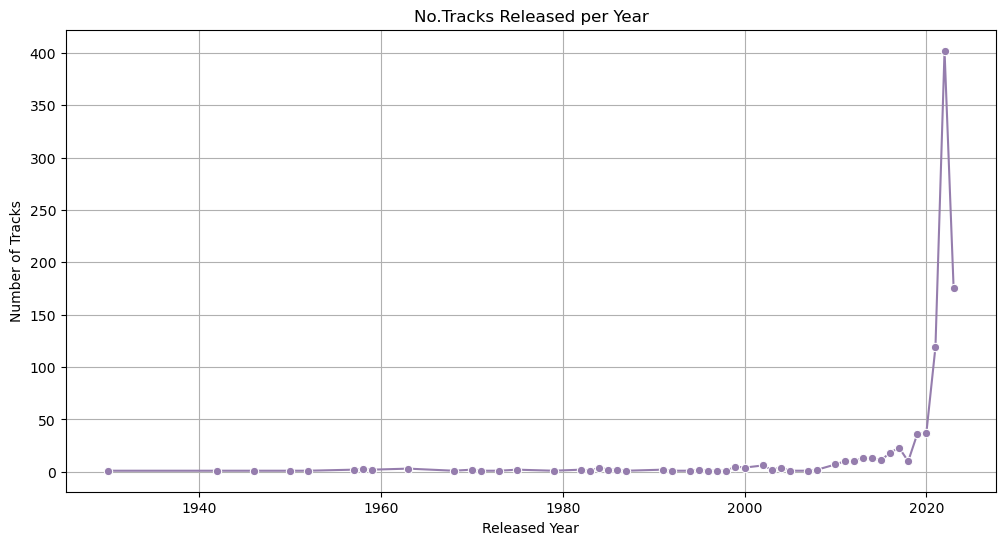

In [55]:
# Plotting the line plot for the count of songs per released year
plt.figure(figsize=(12, 6))
sns.lineplot(x=trackperyear.index, y=trackperyear.values, marker="o", color='#957DAD')
plt.title("No.Tracks Released per Year")
plt.xlabel("Released Year")
plt.ylabel("Number of Tracks") # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


### Number of Tracks per Month

- To calculate the number of tracks per year, the command **<span style="background-color: #FFDFD3; color: black">'.value_counts'</span>** can be used
  - **Syntax** - varname = dataFrame['released_month'].valuecounts().sort_index()
  - **.value_counts()** - counts the occurrences of each unique value in the released_year column of dataset.
  - **.reset_index()** - used to properly format the table

In [57]:
#Get the number of Tracks released per month
trackpermonth = dataset['released_month'].value_counts().reset_index()
#Sort values in ascending order
trackpermonth = trackpermonth.sort_values(by='released_month')
trackmonthtable = trackpermonth.reset_index()
#Print the values
print(trackmonthtable.head())
print(trackmonthtable.tail())


   index  released_month  count
0      0               1    134
1      9               2     61
2      2               3     86
3      7               4     66
4      1               5    128
    index  released_month  count
7      11               8     46
8      10               9     56
9       6              10     73
10      4              11     80
11      5              12     75


- To properly visualize the data, a bar plot can be used
  - **Commands Used**
    - **sns.barplot()** - Creates a barplot of the given data
      - **Syntax** - sns.barplot(x=data1, y=data2, palette="pallete_colors", hue=data1)
    - **plt.title()** - Creates the title of the plot
    - **plt.figure(figsize=(x,y))** - Determines the canvas size of the plot
    - **plt.xlabel** - Creates Label for X Axis
    - **plt.ylabel** - Creates Label for Y Axis
    - **plt.show()** - Prints the plot

### Plot for No. Songs Released per Month

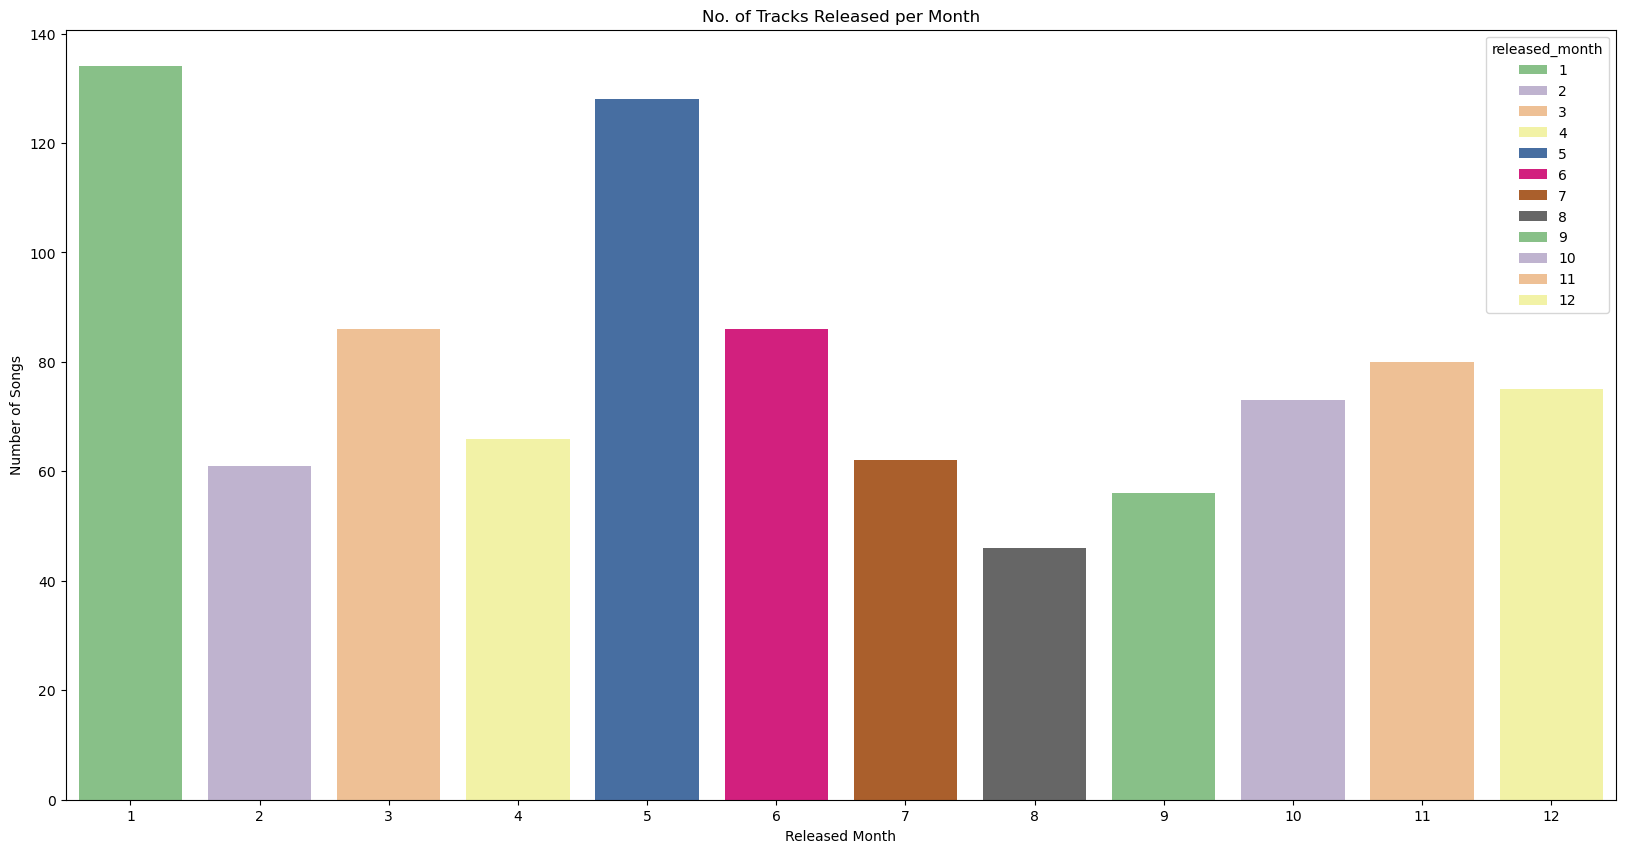

In [60]:
#Configure the figure size
plt.figure(figsize=(20, 10))
#Create barplot
sns.barplot(data=trackpermonth, x='released_month', y='count', palette='Accent',hue='released_month')
#Format the titles and labels
plt.title("No. of Tracks Released per Month")
plt.xlabel("Released Month")
plt.ylabel("Number of Songs")
plt.show()

## Genre and Music Characteristics

### Correlation between streams and musical attributes

- In order to perform a correlational analysis **<span style="background-color: #FFDFD3; color: black">'.corr()'</span>** command
- **Syntax** - varname = dataframe['streams'].corr(dataframe.['musicalattribute'])

In [64]:
#Using the given syntax, get the correlation of streams between the three musical attributes
bpmcor = dataset['streams'].corr(dataset['bpm'])
dancecor = dataset['streams'].corr(dataset['danceability_%'])
energycor = dataset['streams'].corr(dataset['energy_%'])

#Print the values of correlations
print('Correlation Between Streams and BPM:',bpmcor)
print('\nCorrelation Between Streams and Danceability:', dancecor)
print('\nCorrelation Between Streams and Energy:', energycor)



Correlation Between Streams and BPM: -0.0020107392431484824

Correlation Between Streams and Danceability: -0.10445104424167974

Correlation Between Streams and Energy: -0.02631090790485633


### Plot for Correlations between streams

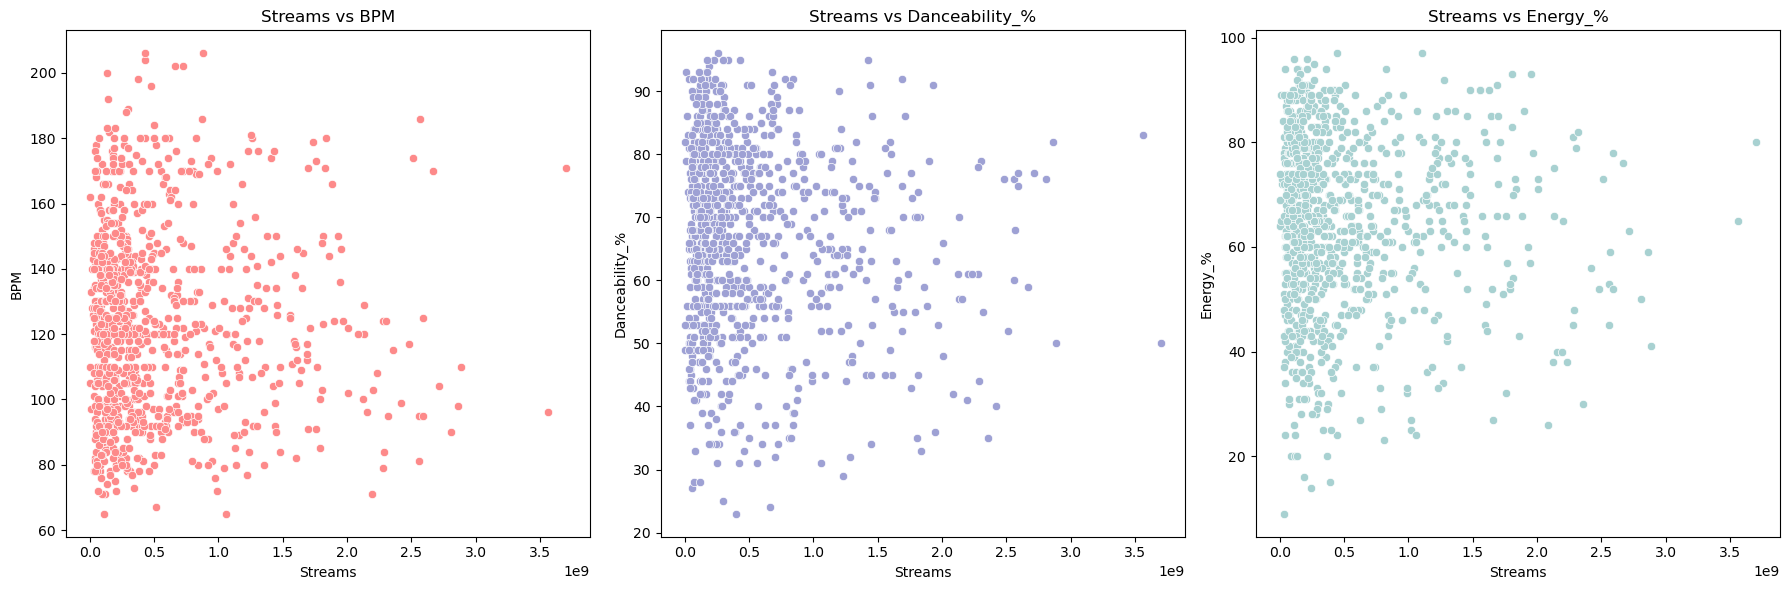

In [66]:
# Create a single figure with subplots for each scatter plot using plt.subplot
plt.figure(figsize=(18, 6))

# Scatter plot for streams vs bpm in the first subplot
plt.subplot(1, 3, 1)
sns.scatterplot(data=dataset, x='streams', y='bpm',color='#FD8A8A')
plt.title("Streams vs BPM")
plt.xlabel("Streams")
plt.ylabel("BPM")

# Scatter plot for streams vs danceability_% in the second subplot
plt.subplot(1, 3, 2)
sns.scatterplot(data=dataset, x='streams', y='danceability_%',color='#9EA1D4')
plt.title("Streams vs Danceability_%")
plt.xlabel("Streams")
plt.ylabel("Danceability_%")

# Scatter plot for streams vs energy_% in the third subplot
plt.subplot(1, 3, 3)
sns.scatterplot(data=dataset, x='streams', y='energy_%',color='#A8D1D1')
plt.title("Streams vs Energy_%")
plt.xlabel("Streams")
plt.ylabel("Energy_%")

# Adjust layout for clarity
plt.tight_layout()
plt.show()


###  Correlations of Danceability vs Energy and Valence vs Acousticness

In [68]:
#Calculate the correlation between Danceability vs Energy
dance_energy_corr = dataset['danceability_%'].corr(dataset['energy_%'])
#Calculate the correlation between Valence vs Acousticness
val_acou_corr = dataset['valence_%'].corr(dataset['acousticness_%'])

#Print the correlation values
print('Correlation Between Danceability and Energy:',dance_energy_corr)
print('\nCorrelation Between Valence and Acousticness:',val_acou_corr)

Correlation Between Danceability and Energy: 0.1980948483762571

Correlation Between Valence and Acousticness: -0.08190727483082756


### Plot for Correlations of Danceability vs Energy and Valence vs Acousticness

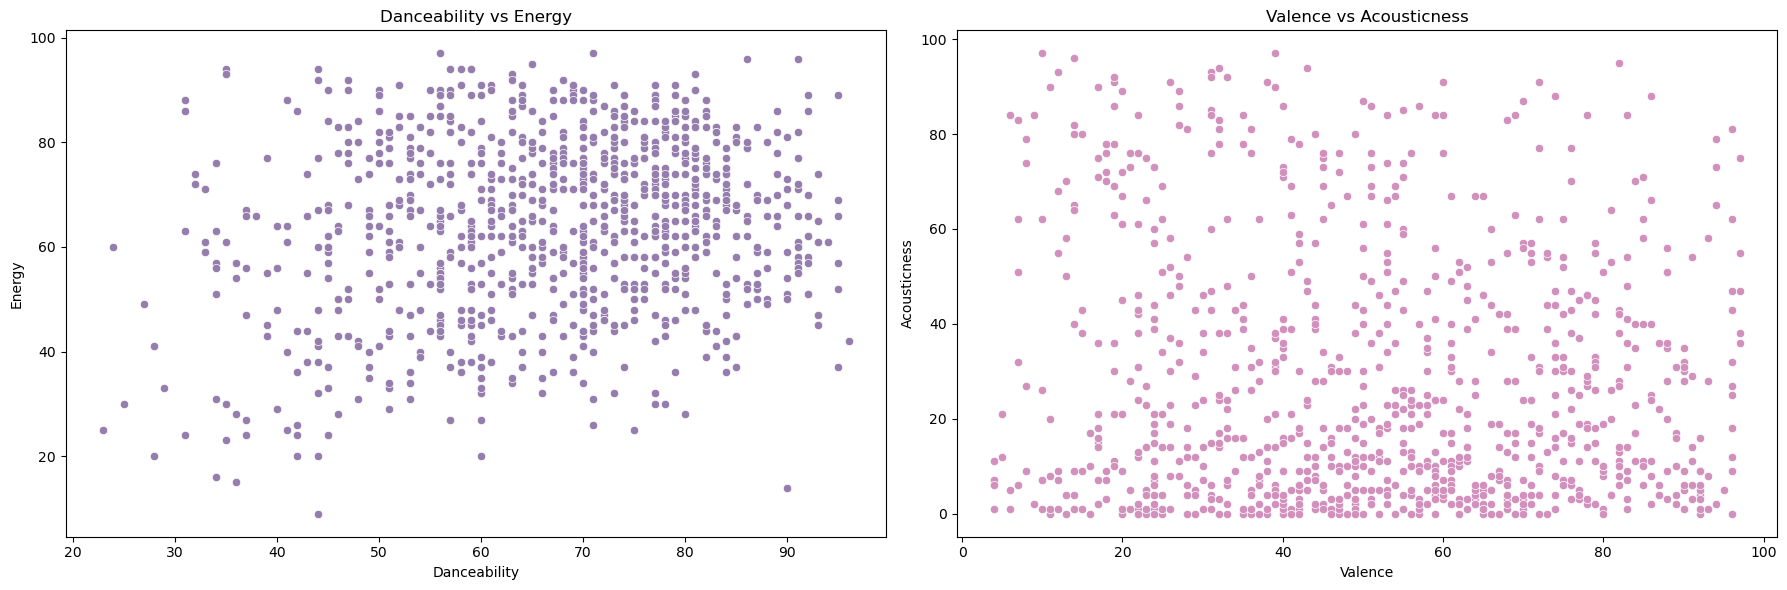

In [70]:
#Configure the figure size
plt.figure(figsize=(18, 6))

#Create subplots to view both plots 
# Scatter plot for streams vs bpm in the first subplot
plt.subplot(1, 2, 1)
sns.scatterplot(data=dataset, x='danceability_%', y='energy_%',color='#957DAD')
plt.title("Danceability vs Energy")
plt.xlabel("Danceability")
plt.ylabel("Energy")

# Scatter plot for streams vs danceability_% in the second subplot
plt.subplot(1, 2, 2)
sns.scatterplot(data=dataset, x='valence_%', y='acousticness_%',color='#D291BC')
plt.title("Valence vs Acousticness")
plt.xlabel("Valence")
plt.ylabel("Acousticness")

# Adjust layout for clarity
plt.tight_layout()
plt.show()

## Platform Popularity

- To calculate total number of tracks per platforms' playlist/chart the command .sum() can be used
- **.sum()** - enables user to be able to get the total values of the column
- **Syntax** = varname = dataframe[platformtlist/chart].sum()

In [73]:
# Get the sum of the specified columns
spotplaylist = dataset['in_spotify_playlists'].sum()
spotcharts = dataset['in_spotify_charts'].sum()
appleplaylist = dataset['in_apple_playlists'].sum()
#Print the values
print('Number of Tracks in spotify_playlists:',spotplaylist)
print('\nNumber of Tracks in spotify_charts:', spotcharts)
print('\nNumber of Tracks in apple_playlists:',appleplaylist)

# Get the sum of the specified columns
applecharts = dataset['in_apple_charts'].sum()
deezerlist = dataset['in_deezer_playlists'].sum()
deezercharts = dataset['in_deezer_charts'].sum()
#Total the data from charts and playlist for each platfotm
appletotal = applecharts + appleplaylist
deezertotal = deezercharts + deezerlist 
spotifytotal = spotplaylist + spotcharts
shazamtotal= dataset['in_shazam_charts'].sum()

# Print results
print('\n\nNumber of Tracks in Apple is:',appletotal)
print('\nNumber of Tracks in Deezer is:', deezertotal)
print('\nNumber of Tracks in Spotify is:', spotifytotal)
print('\nNumber of Tracks in Shazam is:', shazamtotal)

Number of Tracks in spotify_playlists: 4955719

Number of Tracks in spotify_charts: 11445

Number of Tracks in apple_playlists: 64625


Number of Tracks in Apple is: 114094

Number of Tracks in Deezer is: 369625

Number of Tracks in Spotify is: 4967164

Number of Tracks in Shazam is: 54176


## Plotting the number of tracks in Spotify Playlist, Spotify Charts, and Apple Playlist

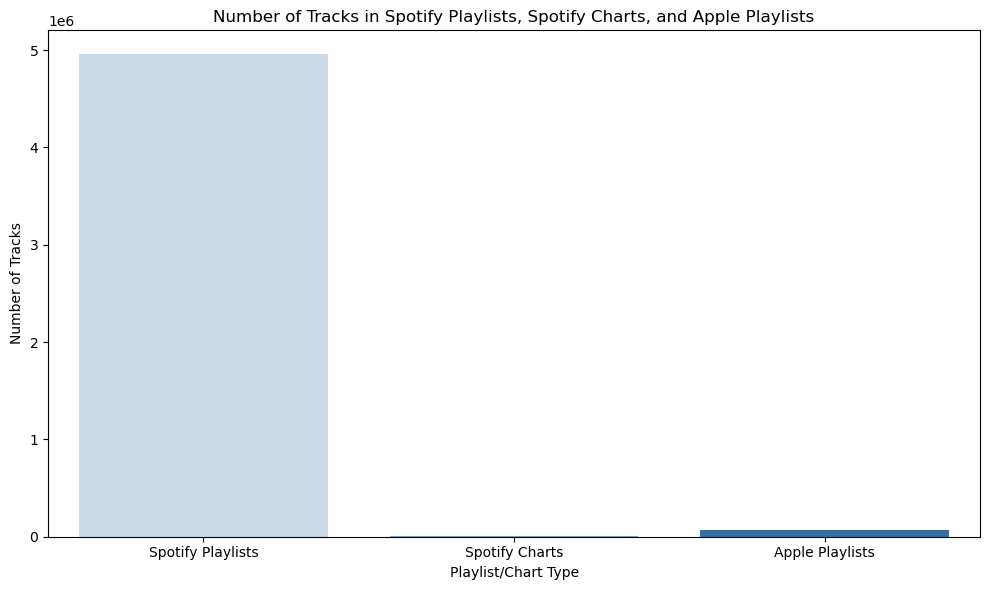

In [75]:
#Create a dictionary the contains Spotify Playlist, Spotify Charts, and Apple Playlist and its corresponding values 
playlist_counts = {'Spotify Playlists': spotplaylist,'Spotify Charts': spotcharts,'Apple Playlists': appleplaylist}
#Configure the figure size
plt.figure(figsize=(10, 6))
#Create a bar plot of the data
sns.barplot(x=list(playlist_counts.keys()), y=list(playlist_counts.values()), palette='Blues',hue=list(playlist_counts.keys()))
#Format the labels and titles of the plot
plt.xlabel('Playlist/Chart Type')
plt.ylabel('Number of Tracks')
plt.title('Number of Tracks in Spotify Playlists, Spotify Charts, and Apple Playlists')
plt.tight_layout()
plt.show()



## Plotting number of tracks per platform

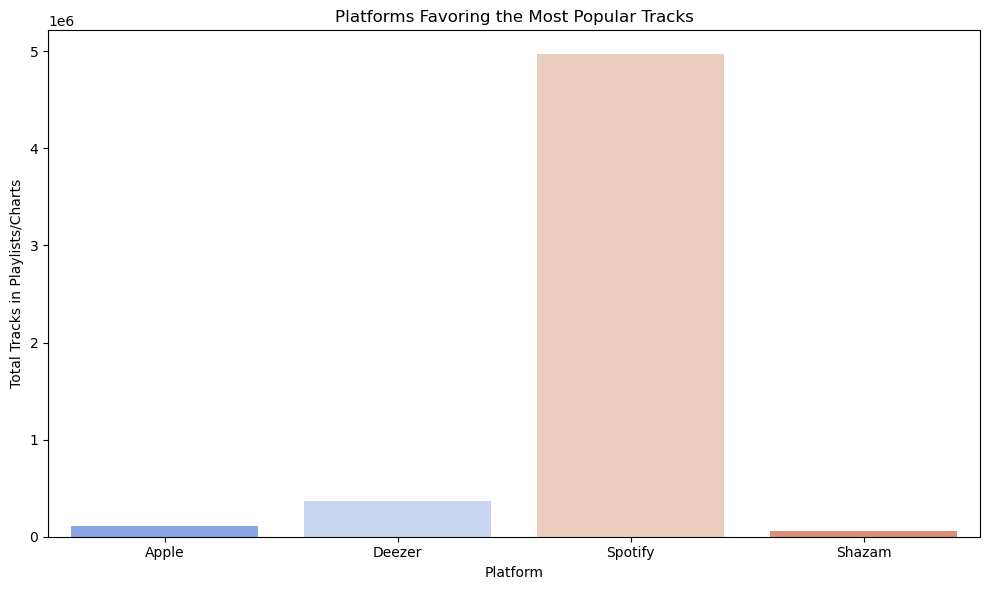

In [77]:
# Create a dictionary which contains the total number of tracks per platform
platform_totals = {'Apple': appletotal, 'Deezer': deezertotal,'Spotify': spotifytotal, 'Shazam': shazamtotal}
#Configure figure size
plt.figure(figsize=(10, 6))
#Create a barplot
sns.barplot(x=list(platform_totals.keys()), y=list(platform_totals.values()), palette='coolwarm',hue=list(platform_totals.keys()))
#Put appropriate titles and labels
plt.xlabel('Platform')
plt.ylabel('Total Tracks in Playlists/Charts')
plt.title('Platforms Favoring the Most Popular Tracks')
plt.tight_layout()
plt.show()

## Advanced Analysis

In [79]:
#create a dataset that contains'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts'
columns_track = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']

# Calculate the sum for each row across the specified columns and create a new column
dataset['total_appearances'] = dataset[columns_track ].sum(axis=1)

#Group by key and mode and calculate the total track count, playlist/chart count, and streams
spotify_summary = dataset.groupby(['key', 'mode']).agg(total_tracks=('track_name', 'size'),total_playlist_chart_count=('total_appearances', 'sum'),total_streams=('streams', 'sum')).reset_index()

#print results
print(spotify_summary.head())
print('\n',spotify_summary.tail())

  key   mode  total_tracks  total_playlist_chart_count  total_streams
0   0  Major            75                      378735   3.749617e+10
1   0  Minor            20                      162928   1.201712e+10
2   A  Major            42                      188364   1.648037e+10
3   A  Minor            33                      112381   1.377389e+10
4  A#  Major            27                      129337   1.694341e+10

    key   mode  total_tracks  total_playlist_chart_count  total_streams
19  F#  Minor            43                      353276   2.560616e+10
20   G  Major            66                      431685   3.253676e+10
21   G  Minor            30                       98077   1.091278e+10
22  G#  Major            63                      372811   3.438568e+10
23  G#  Minor            28                       83303   9.013301e+09


### Plot for Total Tracks by Key and Mode

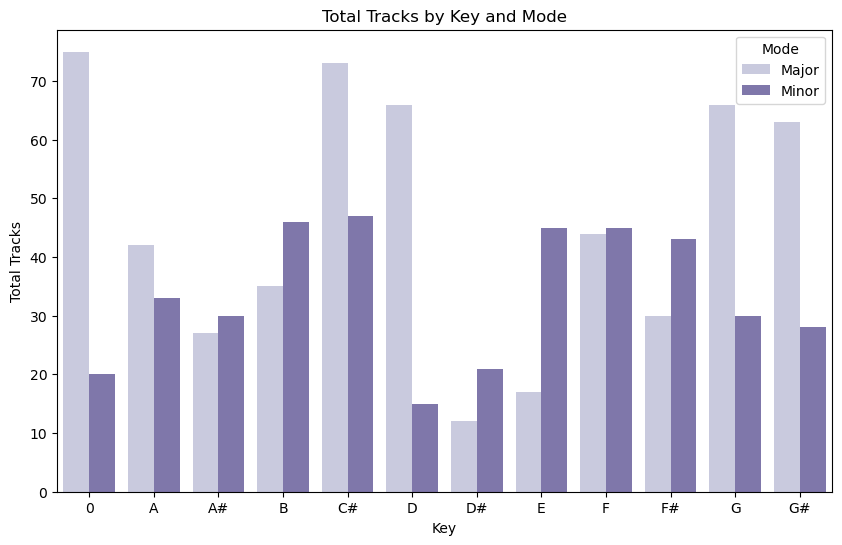

In [81]:
#Configure figuresize
plt.figure(figsize=(10, 6))
#Create barplot of total tracks by Key and Mode
sns.barplot(data=spotify_summary, x='key', y='total_tracks', hue='mode',palette='Purples')
#Configure the title and labels
plt.title("Total Tracks by Key and Mode")
plt.xlabel("Key")
plt.ylabel("Total Tracks")
plt.legend(title="Mode")
plt.show()



### Plot for Total Playlist/Chart Count by Key and Mode

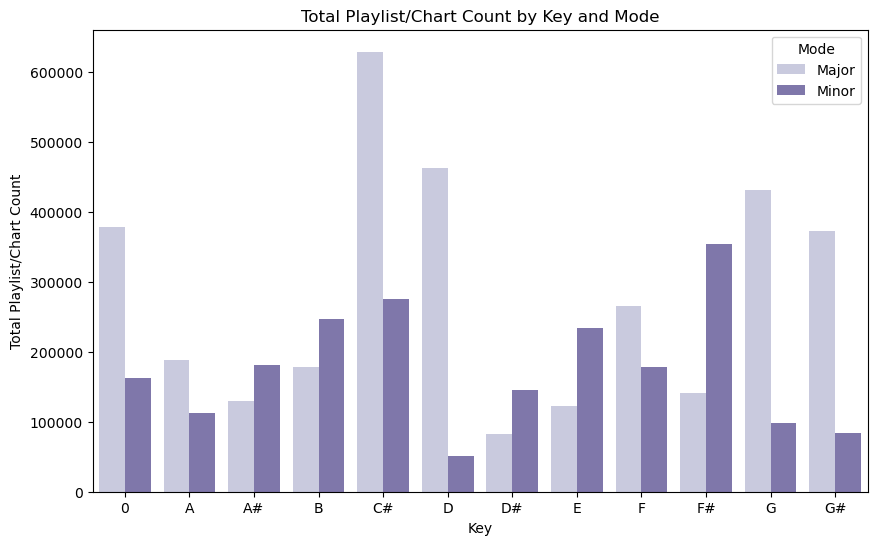

In [83]:
# Sample plot showing total playlist/chart count by key and mode
plt.figure(figsize=(10, 6))
#Create barplot of total playlist/chart count by Key and Mode
sns.barplot(data=spotify_summary, x='key', y='total_playlist_chart_count', hue='mode',palette='Purples')
#Configure titles and lables
plt.title("Total Playlist/Chart Count by Key and Mode")
plt.xlabel("Key")
plt.ylabel("Total Playlist/Chart Count")
plt.legend(title="Mode")
plt.show()


### Plot for Total Streams by Key and Mode

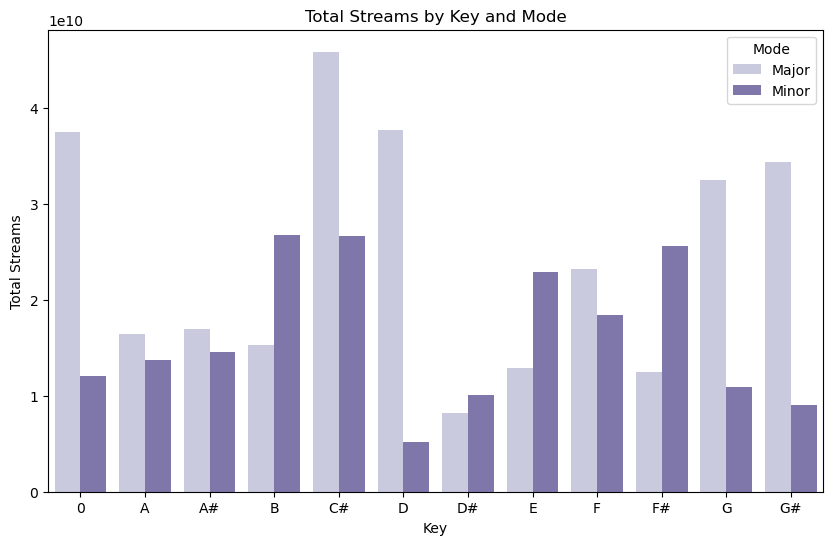

In [85]:
# Sample plot showing total streams by key and mode
plt.figure(figsize=(10, 6))
# Create barplot of total streams by Key and Mode
sns.barplot(data=spotify_summary, x='key', y='total_streams', hue='mode',palette='Purples')
# Configure titles and labels
plt.title("Total Streams by Key and Mode")
plt.xlabel("Key")
plt.ylabel("Total Streams")
plt.legend(title="Mode")
plt.show()

# Top Artists per Total Appearances

In [87]:
# Calculate the total appearances across all platforms for each artist
#Create dataframe the contains the columns of playlist and charts of each platform
totaldata = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists','in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']
#Calculate the total appearances in every platform
dataset['total_appearances'] = dataset[totaldata].sum(axis=1)
dataset['total_appearances'].reset_index()
#Arrange the data from the top 10 highest total appearances
top_artists_total_appearances = dataset.groupby('artist(s)_name')['total_appearances'].sum().nlargest(10).reset_index()
top_artists_total_appearances


,artist(s)_name,total_appearances
0,The Weeknd,155686
1,Ed Sheeran,148657
2,Taylor Swift,142133
3,Harry Styles,116550
4,Eminem,103644
5,Arctic Monkeys,89886
6,Coldplay,88931
7,"Dr. Dre, Snoop Dogg",79126
8,Avicii,76640
9,Adele,76029


### Plot of Top Artist per Total Appearances

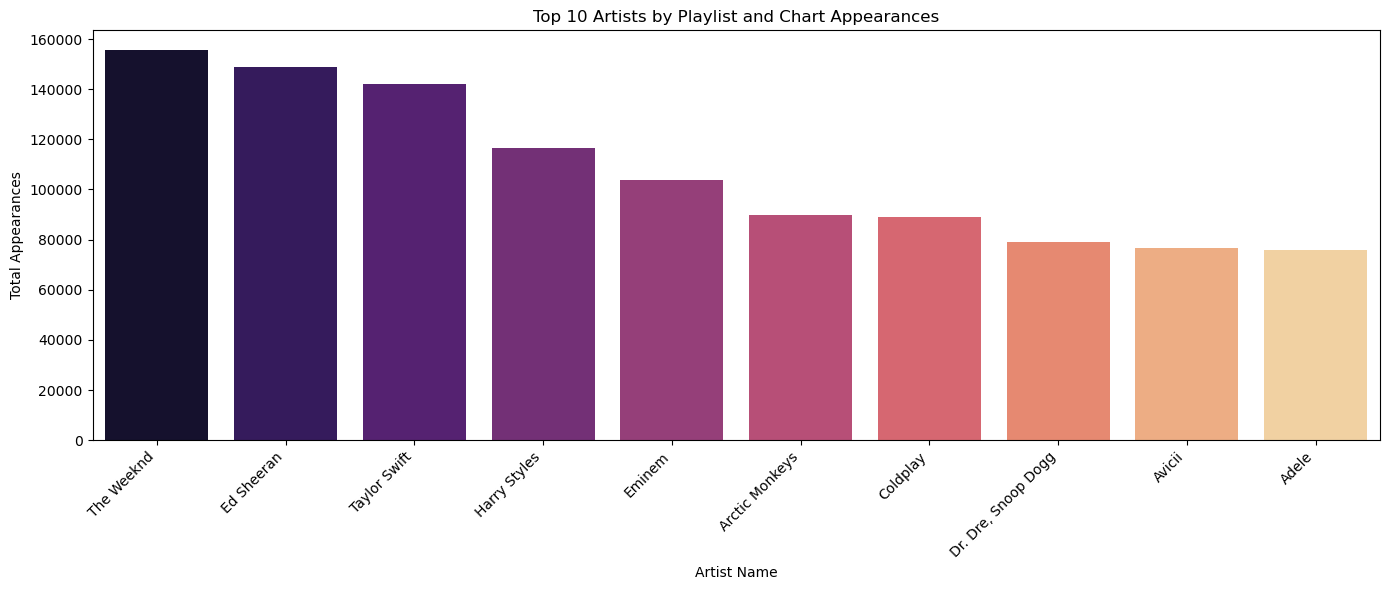

In [89]:
# Plotting the barplot for the top artists by total appearances
#Configure the figure size
plt.figure(figsize=(14, 6))
#Create barplot of top artist per total appearances
sns.barplot(y=top_artists_total_appearances['total_appearances'], x=top_artists_total_appearances['artist(s)_name'], palette="magma",hue=top_artists_total_appearances['artist(s)_name'])
#Configure titles and labels
plt.title("Top 10 Artists by Playlist and Chart Appearances")
plt.xlabel("Artist Name")
plt.ylabel("Total Appearances")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()